#### Paper data and plots

This notebook plots the data presented in the paper 'Compare the Pair: Rotated vs. Unrotated Surface Codes at Equal Logical Error Rates' by importing the already-collected data and plotting it. For an example of how to generate this data before plotting it see 'example.ipynb'.

##### Requirements

In [1]:
# pip install stim      # Stim: a stabiliser circuit simulator

In [2]:
# pip install sinter==1.13.0     # Sinter: for bulk sampling of stim circuits

In [3]:
import sinter
import stim

import os
import sys
import pickle

sys.path.insert(0, 'functions') 
import morefuncs as morefuncs
import com_funcs5 as funcs

# Update with any changes to these files:
from importlib import reload
reload(morefuncs)
reload(funcs);

##### Import the collected data:

In [13]:
noise_model = 'SI' # choices are SD and SI

# with open(f'collected_stats/pickled_stats/{noise_model}_stats.pickle', 'rb') as file:
        # mylist = pickle.load(file)

mylist = sinter.stats_from_csv_files(f'collected_stats/x_SI.csv', f'collected_stats/z_SI.csv')


for el in mylist:
        print(el)

  13315790,       255,         0,   191.2,pymatching,1ec33a12f0fcd4d08b9faacb956abd95b4d5a7c4d04184219b7c60ded82c6b6d,"{""b"":""x"",""d"":10,""idl"":""y"",""noise"":""CXSI"",""o"":32013021,""p"":0.001,""r"":""3d"",""ro"":""ro""}",
 715095524,       287,         0,  6152.0,pymatching,9712bb3de41601f4349d82299f67c1b60caed782d59b9215398a22262b4845c9,"{""b"":""x"",""d"":10,""idl"":""y"",""noise"":""CXSI"",""o"":32013021,""p"":0.0005,""r"":""3d"",""ro"":""ro""}",
   5541442,      1119,         0,   116.8,pymatching,8231b5e1dd552aee62295313eb674049c6b5fb07320ed734893ce043704fdeb0,"{""b"":""x"",""d"":10,""idl"":""y"",""noise"":""CXSI"",""o"":32013021,""p"":0.0015,""r"":""3d"",""ro"":""ro""}",
7985250030,       257,         0,127950.5,pymatching,f23b6e1c9964973967bd7bdb7228bd299fb7bce62b0cc5724b58243021a50b5b,"{""b"":""x"",""d"":10,""idl"":""y"",""noise"":""CXSI"",""o"":10231203,""p"":0.0005,""r"":""3d"",""ro"":""unro""}",
   1000000,    268889,         0,   134.5,pymatching,ebd829b7fad3bc3dc6

In [5]:
# # bin the CNOT orders to decide which ones to plot:
roorders, unroorders = funcs.bin_CNOT_orders(mylist) # print out CNOT orders 

Rotated code CNOT orders:
32013021

Unrotated code CNOT orders:
10231203


##### Threshold plots: $p_L$ vs. $p$

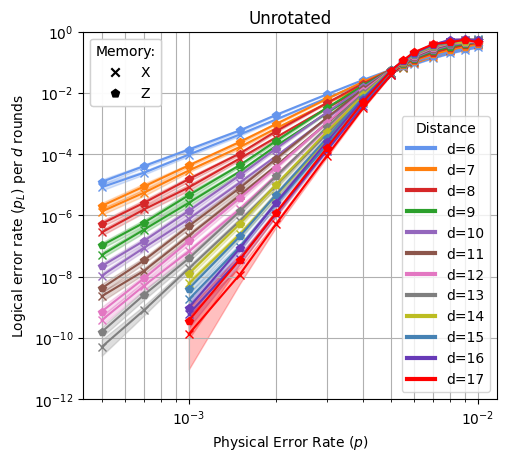

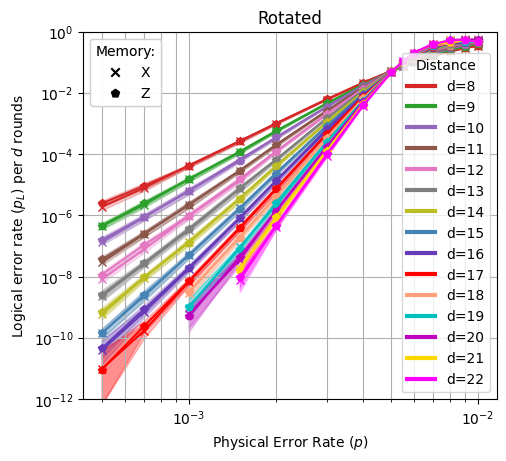

In [6]:
reload(funcs)

roorder = roorders[0] 
unroorder = 10231203 

funcs.plot_thresholds(mylist, roorder, unroorder, romind = 8, unromind = 6, ylims = [1e-12, 1])

##### Fit to scaling function $p_L = \alpha ( p / \beta)^{\gamma d + \delta}$


distances = combined

ro z 32013021

    α = 0.049 ± 0.007
    β = 0.00484 ± 0.00001
    γ = 0.623 ± 0.010
    δ = 0.63 ± 0.15


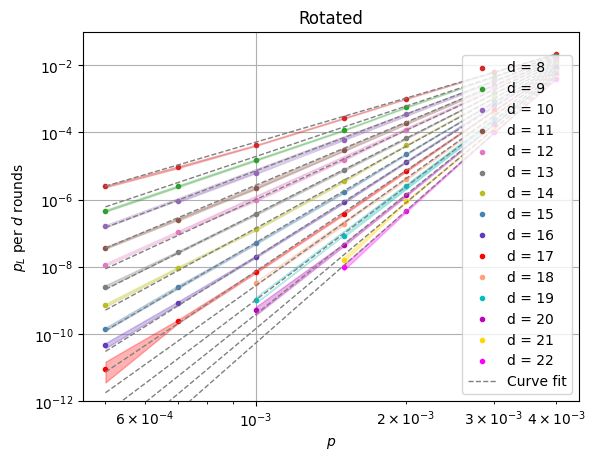


unro z 10231203

    α = 0.053 ± 0.009
    β = 0.00488 ± 0.00003
    γ = 0.755 ± 0.014
    δ = 0.93 ± 0.16


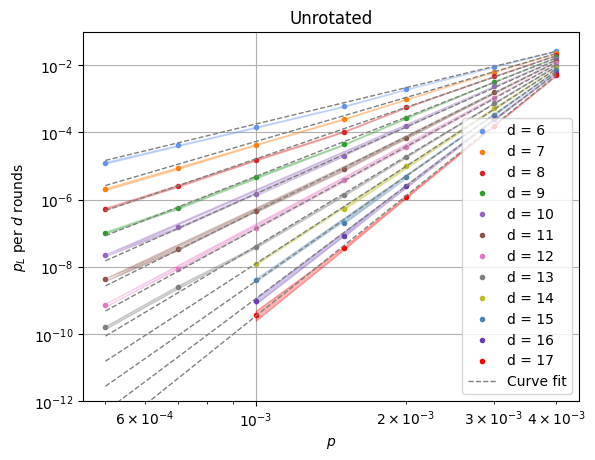

In [7]:
reload(funcs)

b = 'z' # choices are x or z. Memory z is worst-case for unrotated codes with inner CNOTs 0 and 2, e.g. unroorder 12031023.

distances = 'combined' # choices are 'odd', 'even' or 'combined'

# for distances in ['odd','even','combined']:
funcs.fit_scaling_and_plot(mylist, distances, b, roorder, unroorder,minp = 5e-4, maxp = 0.004, romind = 8, unromind = 6, optional_plot = True, ylims = [1e-12, 1e-1])

##### Plot as $p_L$ vs. $\sqrt{n}$

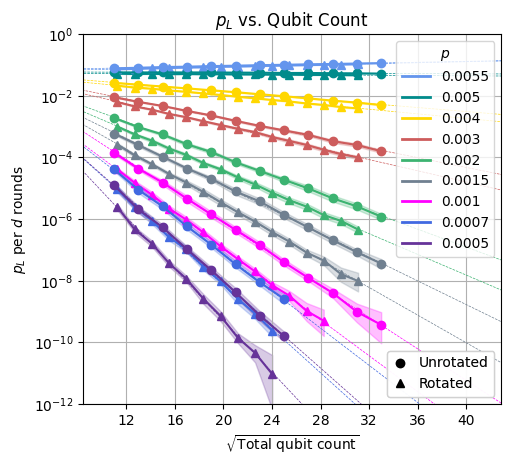

In [8]:
reload(funcs)

b = 'z' 

# give pvalues that have been simulated for for these orders:
pvalues = funcs.give_p_values(mylist, roorder, unroorder)

funcs.plot_pL_vs_qubit_count(mylist, b, roorder, unroorder, ps = [5e-4, 7e-4, 1e-3, 1.5e-3, 2e-3, 3e-3, 4e-3, 5e-3, 5.5e-3], romind = 8, unromind = 6)

##### Plot ratios of qubit counts vs. $p_L$

This is the projected number of qubits used by the rotated surface code divided by the number of qubits used by the unrotated surface code to achieve the same $p_L$

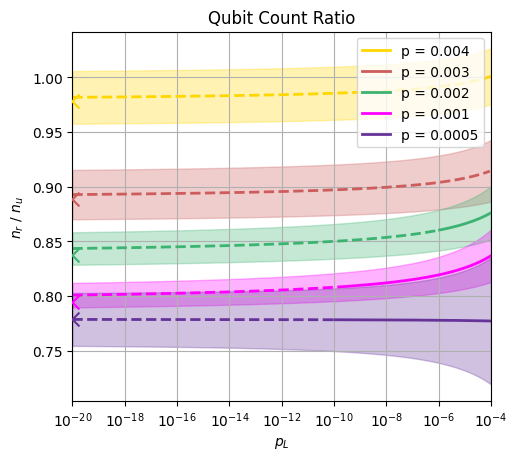

In [9]:
reload(funcs)

b = 'x' 

plot_pvalues = [0.0005, 0.001, 0.002, 0.003, 0.004]

funcs.plot_ratio(mylist, b, roorder, unroorder, romind = 8, unromind = 6, ps = plot_pvalues, paper_ylims = False)

##### Plot 'teraquop' count :$\ $ the number of qubits required to reach $p_L = 10^{-12}$

<IPython.core.display.Math object>

unro_1203
1846.771562141237
24.8199538164958
ro
1395.8202173991224
17.60609340909099


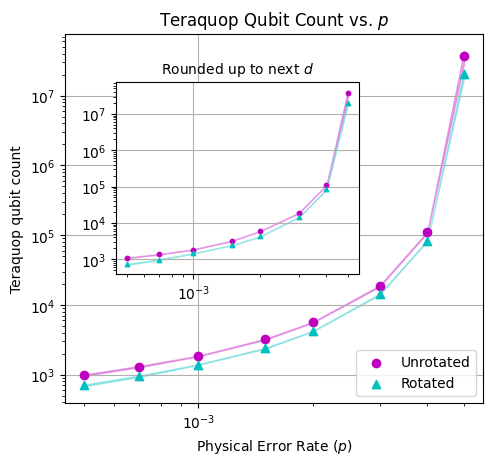

In [10]:
reload(funcs)

b = 'z' 
ps = pvalues[0:9] if noise_model == 'SD' else pvalues[0:8]

funcs.plot_teraquop(mylist, b, roorder, unroorder, ps = ps, teraquop_inset = True, romind = 8, unromind = 6, optional_plot = False)  # make sure selection of pvalues is below / very close to threshold

##### Memory time vs. $\sqrt{n}$

This is a reformulation of the $p_L$ vs. $\sqrt{n}$ plots above, converting the $p_L$ per $d$ rounds to be the length of time (assuming one stabiliser measurement cycle take a microsecond) before $p_L$ over the entire shot of the memory experiment equals $p$.

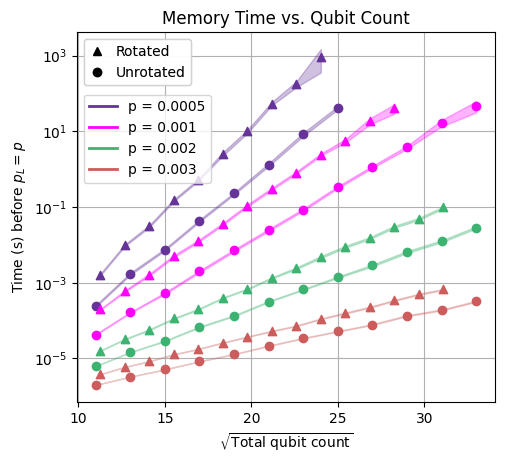

In [11]:
reload(funcs)

b = 'z'

funcs.plot_memory_times(mylist, b, roorder, unroorder, ps = [0.0005, 0.001, 0.002, 0.003], romind = 8, unromind = 6, plotagainst = 'rtqubits')